# Multilayered perceptron (MLP) image classification exercises
## 0. Fashion dataset (*)


In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt







(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [22]:
labels ={
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot",
}

### a) Start visualizing some of the sample images

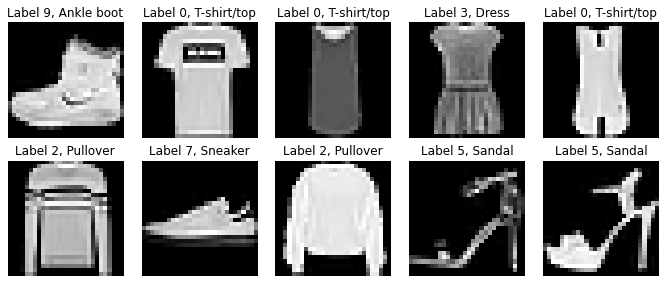

In [26]:
def display_images(data, nrows = 2, ncols = 5, figsize = (12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap = "gray", )
        ax.axis("off")
        ax.set_title(f"Label {y_train[i]}, {labels[y_train[i]]}")

    fig.subplots_adjust(wspace=0, hspace=.2, bottom=0)

display_images(x_train)


### b) Normalize the images to values between 0 and 1

In [27]:
x_train_normalized = x_train.astype("float32")/255
x_test_normalized = x_test.astype("float32")/255

###  c) Visualize same images as before, do you see any difference?

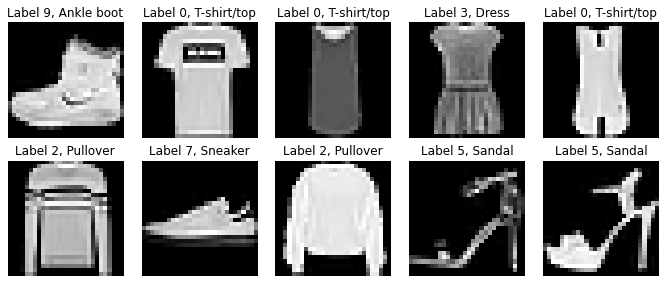

In [28]:
display_images(x_train_normalized)

Ser ingen skillnad. Rimligt!


###  d) Make histogram of a sample image before and after normalization. What do you notice?


De kommer se lika ut. Bara skalana på x-axeln kommer skilja. (Om man tar lika många bins så klart.)


###  e) Check if the dataset is balanced.

In [31]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [32]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

Full balans. Rena zen.